<a href="https://colab.research.google.com/github/Asmina-hub/DeepLearning_Perceptron_Implementation/blob/main/Keras_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**We will use a neural network to predict diabetes using the Pima Diabetes Dataset**
We will initially use Random Forest to get a performance baseline. Then we will use the Keras package to quickly build and train a neural network and compare the performance. We will see how different network structures affect the performance, training time, and level of overfitting (or underfitting).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# prompt: import sklearn train test

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler


In [ ]:
dataset=pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


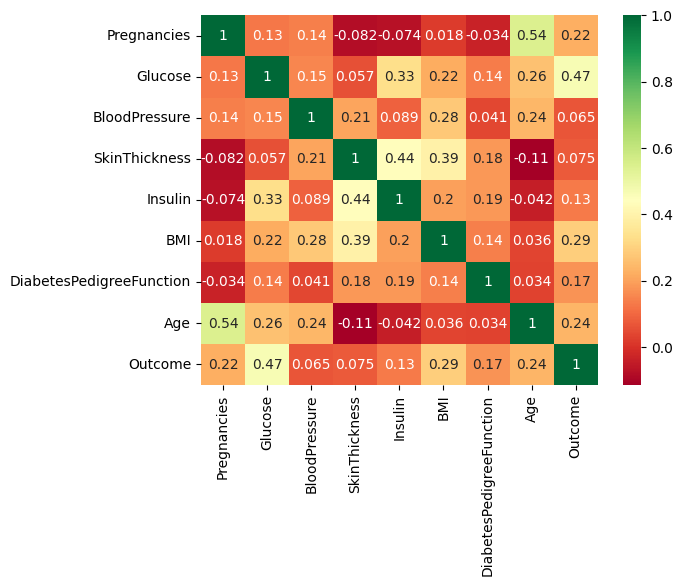

In [ ]:
#check for correlations
p=sns.heatmap(dataset.corr(), annot=True,cmap ='RdYlGn')


In [ ]:
X=dataset.drop('Outcome',axis=1).values
y=dataset['Outcome'].values

In [ ]:
x,x_test,y,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
model=RandomForestClassifier(n_estimators=200)
model.fit(x,y)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

0.8246753246753247

In [56]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7430900775502088

In [57]:
y_pred_class_rf = model.predict(x_test)
y_pred_prob_rf = model.predict_proba(x_test)


print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.825
roc-auc is 0.862


In [69]:
y_pred_class_rf

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

[Explaination on ROC and AUC](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5#:~:text=ROC%20is%20a%20probability%20curve,and%201%20classes%20as%201.)

[Text(0.5, 1.0, 'ROC Curve for RandomForestClassifier(n_estimators=200) on PIMA diabetes problem'),
 (-0.01, 1.01),
 (-0.01, 1.01)]

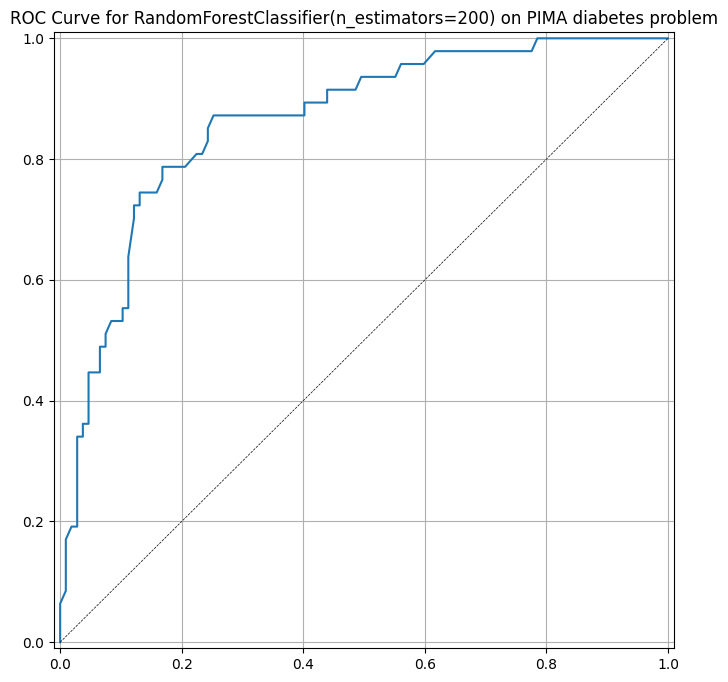

In [58]:
fpr, tpr, thr = roc_curve(y_test, y_pred_prob_rf[:,1])
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
ax.grid(True)
ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model),
        xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



**Using Neural Network with Keras**



In [70]:
import tensorflow as tf

In [71]:
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [72]:
## First let's normalize the data
## This aids the training of neural nets by providing numerical stability
## Random Forest does not need this as it finds a split only, as opposed to performing matrix multiplications

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(x)
X_test_norm = normalizer.transform(x_test)

In [73]:
model1=Sequential()
model1.add(Dense(12,input_dim=8,activation='relu'))
model1.add(Dense(1,activation='relu'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:

model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [75]:
model1.compile(SGD(learning_rate=0.003), "binary_crossentropy", metrics=["accuracy"])

In [76]:
model1.fit(X_train_norm, y, batch_size=10,validation_data=(X_test_norm, y_test), epochs=500, verbose=1)

Epoch 1/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6337 - loss: 2.4597 - val_accuracy: 0.7468 - val_loss: 1.2821
Epoch 2/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6828 - loss: 1.1329 - val_accuracy: 0.7597 - val_loss: 0.7249
Epoch 3/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7187 - loss: 0.8593 - val_accuracy: 0.7532 - val_loss: 0.6829
Epoch 4/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7336 - loss: 0.7141 - val_accuracy: 0.7727 - val_loss: 0.6538
Epoch 5/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7399 - loss: 0.6342 - val_accuracy: 0.7662 - val_loss: 0.6508
Epoch 6/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7212 - loss: 0.7845 - val_accuracy: 0.7857 - val_loss: 0.6371
Epoch 7/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7321 - loss: 0.7038 - val_accuracy: 0.7662 - val_loss: 0.6519
Epoch 8/500
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7304 - loss: 0.5877 - val_accuracy: 0.7727 - v

In [77]:
y_pred=model1.predict(X_test_norm)
y_pred1 = (y_pred > 0.5).astype(int)

y_pred1

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [78]:
y_pred

array([[1.1902001 ],
       [0.        ],
       [0.23488057],
       [0.5682842 ],
       [0.        ],
       [0.        ],
       [0.85945034],
       [0.8518163 ],
       [0.6918452 ],
       [0.48990783],
       [0.6854712 ],
       [1.0327125 ],
       [0.        ],
       [0.49173576],
       [0.49182206],
       [0.30441627],
       [1.0150856 ],
       [0.        ],
       [0.14888969],
       [0.40360668],
       [0.6807941 ],
       [0.06942061],
       [0.4739254 ],
       [0.3461158 ],
       [0.        ],
       [0.58356166],
       [0.        ],
       [1.2082373 ],
       [0.06488463],
       [0.06083357],
       [0.3661101 ],
       [0.38879186],
       [0.        ],
       [0.62460876],
       [0.        ],
       [0.77461797],
       [0.30988505],
       [0.        ],
       [0.2549225 ],
       [0.9485271 ],
       [0.34120896],
       [0.        ],
       [0.22287594],
       [1.0032735 ],
       [1.2257792 ],
       [0.        ],
       [0.        ],
       [0.   

In [79]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred)))


accuracy is 0.773
roc-auc is 0.807


In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

[Text(0.5, 1.0, 'ROC Curve for RandomForestClassifier(n_estimators=200) on PIMA diabetes problem'),
 (-0.01, 1.01),
 (-0.01, 1.01)]

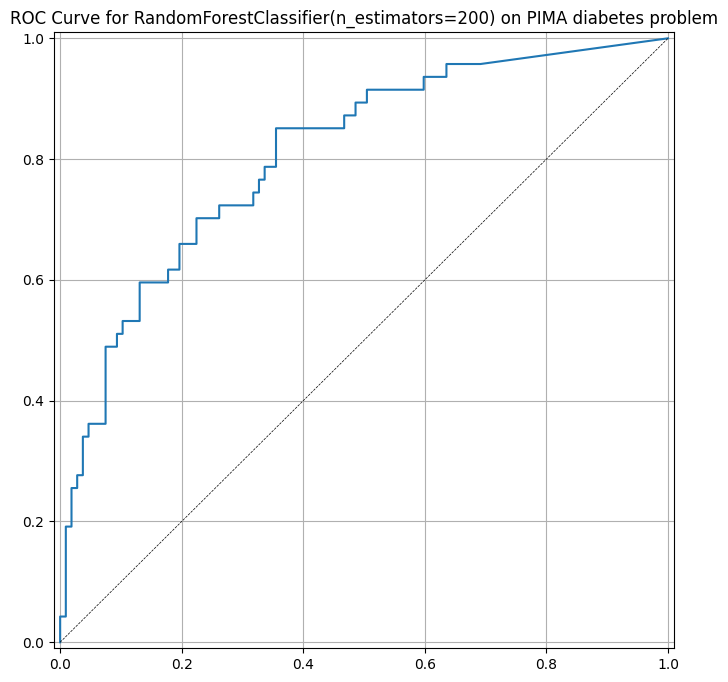

In [80]:
fpr, tpr, thr = roc_curve(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
ax.grid(True)
ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model),
        xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

0.7430900775502088